# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

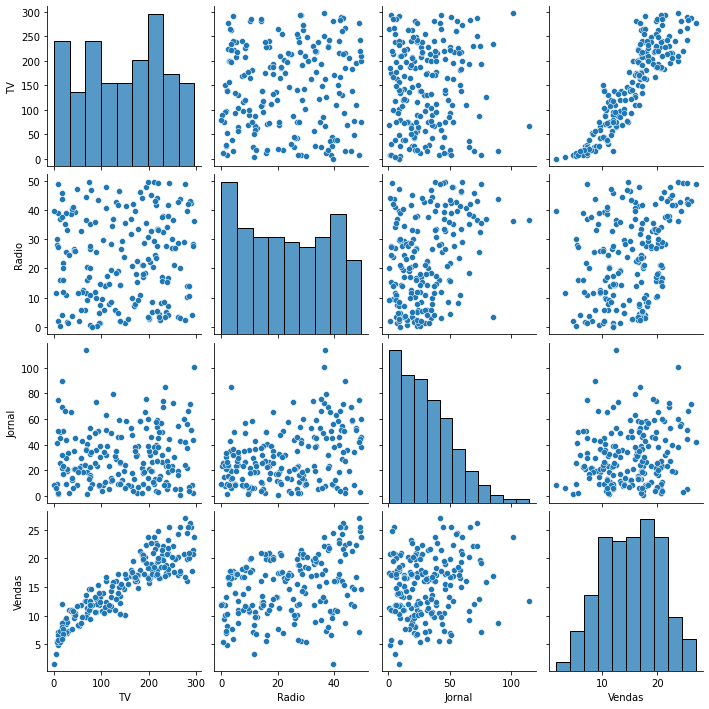

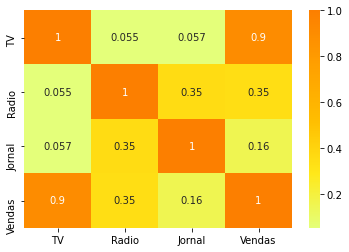

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [12]:
from sklearn.model_selection import train_test_split
x = tabela.drop('Vendas', axis=1)
y = tabela['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

#Treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [17]:
from sklearn import metrics

# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")




R² da Regressão Linear: 0.9071151423684274
MSE da Regressão Linear: 2.3706599712256557
R² do Random Forest: 0.9617363770885112
MSE do Random Forest: 0.9765858666666677


#### Visualização Gráfica das Previsões

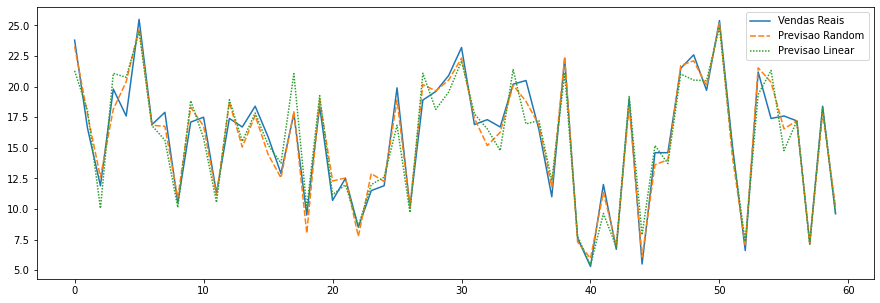

,Vendas Reais,Previsao Random,Previsao Linear
0,23.8,23.278,21.288161
1,16.6,17.731,18.042132
2,11.9,12.596,10.059590
3,19.8,18.156,21.082241
4,17.6,20.403,20.764760
5,25.5,24.747,24.471874
6,16.9,16.839,16.806436
7,17.9,16.759,15.628857
8,10.5,10.901,10.124799
9,17.1,18.313,18.846019


In [20]:
tabela_comparacao = pd.DataFrame()
# df_resultado.index = x_test
tabela_comparacao['Vendas Reais'] = y_test
tabela_comparacao['Previsao Random'] = test_pred_rf
tabela_comparacao['Previsao Linear'] = test_pred_lin
# display(df_resultado)
tabela_comparacao = tabela_comparacao.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_comparacao)
plt.show()
display(tabela_comparacao)

#### Qual a importância de cada variável para as vendas?

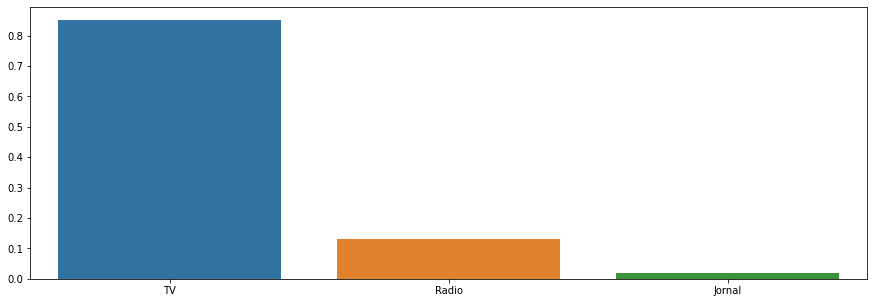

In [21]:
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [25]:
print(tabela[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
